In [1]:
import tweepy
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

# TwitterAPI to collect Draftkings and FanDuel Tweets
   - Dates of tweets =  24 NOV - 01 DEC (API limitation of one week)
    

In [2]:
dk_hashtags = ['#DraftKings', '#DraftKings_bet', '#DK_Assist', '#DKSportsbook', '#dks', 
               '#DraftKingsNews', '#dkuk', '#DraftKings_AUS', '#DKCasino' ] 
fd_hashtags = ['#FanDuel', '#FDSportsbook', '#FanDuel_Support']

In [ ]:
#Twitter credentials
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
def get_tweets(hashtag_list, file_name):
    # Open/Create a file to append data
    csvFile = open(file_name, 'a')
    csvWriter = csv.writer(csvFile)
    for hashtag in hashtag_list:
        for tweet in tweepy.Cursor(api.search,q=hashtag,count=5000,
                           result = 'recent', include_entities=True,
                           lang="en",
                           since="2020-11-23").items():
#             print(tweet.created_at, tweet.text)
            csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), 
                        tweet.user.screen_name, tweet.user.location,
                        tweet.user.followers_count, tweet.user.friends_count,
                        tweet.retweet_count, tweet.source])
   

In [ ]:
get_tweets(dk_hashtags, 'data/dk.csv')

In [ ]:
get_tweets(fd_hashtags, 'data/fd.csv')

# Import to Pandas and conduct EDA

In [3]:
pd.set_option("display.max_colwidth", None)

dk_df = pd.read_csv('../data/dk.csv')
dk_df.columns= ['created', 'text', 'username', 'location', 'follower count', 'friend count', 'retweet', 'source']

fd_df = pd.read_csv('../data/fd.csv')
fd_df.columns= ['created', 'text', 'username', 'location', 'follower count', 'friend count', 'retweet', 'source']

In [4]:
print(dk_df.info())
print(fd_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8931 entries, 0 to 8930
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created         8931 non-null   object
 1   text            8931 non-null   object
 2   username        8931 non-null   object
 3   location        6491 non-null   object
 4   follower count  8931 non-null   int64 
 5   friend count    8931 non-null   int64 
 6   retweet         8931 non-null   int64 
 7   source          8374 non-null   object
dtypes: int64(3), object(5)
memory usage: 558.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created         5748 non-null   object
 1   text            5748 non-null   object
 2   username        5748 non-null   object
 3   location        4354 non-null   object
 4   follower count  5748 n

In [5]:
dk_df.head()

,created,text,username,location,follower count,friend count,retweet,source
0,2020-12-01 19:53:01,"b""WHO IS THE # 1\xe2\x83\xa3 SERVICE IN COLLEGE BASKETBALL?\n\nIT'S US AND IT'S VERIFIED! MEMBERS ALREADY UP OVER $9K AND IT'S VER\xe2\x80\xa6 https://t.co/Hv8hILrib8""",VegasSyndicate,"Henderson, Nevada",10320,3406,0,Twitter Web App
1,2020-12-01 19:49:15,"b""NFL DFS Seahawks v. Eagles - 11/30\nWe hit Cash'd! \xf0\x9f\xa4\x91\xf0\x9f\x92\xb0\nA perfect Week 12 -&gt; NFL DFS record: 34-20\nDM for more Informa\xe2\x80\xa6 https://t.co/UoYc3iTLUW""",dailysportpickz,Cash App: $dailysportpickz,1444,3474,0,Twitter Web App
2,2020-12-01 19:48:16,b'RT @AwesemoGolf: \xf0\x9f\x9a\xa8 LIVE NOW\n\nThe @AwesemoGolf PGA DFS Strategy Show: #MayakobaClassic w/ @JazzrazDFS &amp; @FantasyGolfMan\n\n#draftkings #fandue\xe2\x80\xa6',JoshEngleman,"Wilmington, NC",13060,337,1,TweetDeck
3,2020-12-01 19:40:46,b'RT @dklive: NFL POWER RANKINGS: @davidfucillo reveals his power rankings heading into Week 13 of the NFL season.\n\nSet your #DraftKings line\xe2\x80\xa6',DraftKings,"Boston, MA",309945,1906,1,TweetDeck
4,2020-12-01 19:40:08,b'BOOOOM\xf0\x9f\xa5\xb3\xf0\x9f\x92\xa5\n\nVERIFIED WINNER #2 ON THE DAY!\n\n \xf0\x9f\x91\x91\xf0\x9f\x8f\xa7\xf0\x9f\x91\x91\xf0\x9f\x8f\xa7\xf0\x9f\x91\x91\xf0\x9f\x8f\xa7\xf0\x9f\x91\x91\xf0\x9f\x8f\xa7\xf0\x9f\x91\x91\xf0\x9f\x8f\xa7\xf0\x9f\x91\x91\n \xf0\x9f\x92\x8e\xe2\x9a\xbd\xef\xb8\x8f\xf0\x9f\x92\x8e\xe2\x9a\xbd\xef\xb8\x8fRB SALZBURG OV 2.75\xe2\x9a\xbd\xef\xb8\x8f\xf0\x9f\x92\x8e\xe2\x9a\xbd\xef\xb8\x8f\xf0\x9f\x92\x8e\n \xf0\x9f\x91\x91\xe2\x80\xa6 https://t.co/JQyHHoKgCc',VegasSyndicate,"Henderson, Nevada",10320,3406,0,Twitter Web App


# Which company was hashtagged more over the last week: DraftKings and FanDuel?


In [6]:
#Use percentage change by day since the number of tweets greater in DK

dk_df.created = pd.to_datetime(dk_df.created).dt.strftime('%m/%d/%Y')
fd_df.created = pd.to_datetime(fd_df.created).dt.strftime('%m/%d/%Y')

dk_grouped = dk_df.created.groupby(dk_df.created).agg('count').to_frame('DK_Count').reset_index()
dk_grouped['DK_Percent_Change'] = ((dk_grouped.DK_Count.pct_change().round(2))*100)

fd_grouped = fd_df.created.groupby(fd_df.created).agg('count').to_frame('FD_Count').reset_index()
fd_grouped['FD_Percent_Change'] = ((fd_grouped.FD_Count.pct_change().round(2))*100)
fd_grouped.drop('created', axis=1, inplace=True)

grouped_percent_change = pd.concat([dk_grouped, fd_grouped],axis=1)
grouped_percent_change.index = grouped_percent_change.created
grouped_percent_change = grouped_percent_change.drop(columns = ['created', 'DK_Count', 'FD_Count'])
grouped_percent_change = grouped_percent_change.replace('nan%', "")
grouped_percent_change.index.rename('Date', inplace=True)

grouped_percent_change

,DK_Percent_Change,FD_Percent_Change
Date,,
11/23/2020,NaN,NaN
11/24/2020,-38.0,-18.0
11/25/2020,42.0,28.0
11/26/2020,52.0,33.0
11/27/2020,50.0,71.0
11/28/2020,-24.0,-25.0
11/29/2020,23.0,-0.0
11/30/2020,13.0,-30.0
12/01/2020,-33.0,-19.0


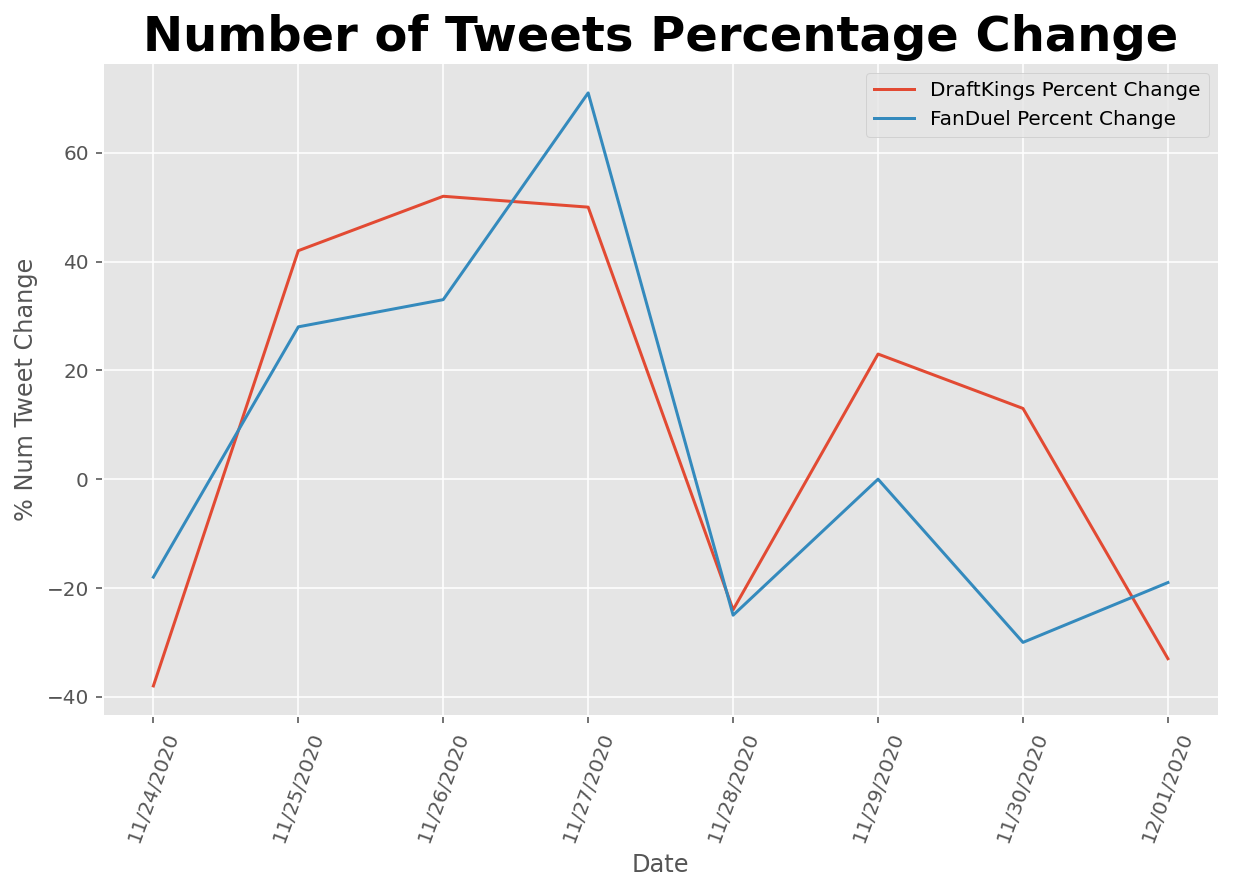

In [7]:
#Plot the percent change in tweet volume
 
grouped_percent_change['DK_Percent_Change'].plot(grid=True, label ='DraftKings Percent Change');
grouped_percent_change['FD_Percent_Change'].plot(grid=True, label ='FanDuel Percent Change');
plt.ylabel('% Num Tweet Change');
plt.xticks(rotation=70);
plt.legend(loc='upper right');
plt.title('Number of Tweets Percentage Change', fontsize=24, fontweight='bold');
plt.savefig('../img/Num_Tweets', bbox_inches='tight');
plt.show()

# Is there a relationship between follower counts and retweets?

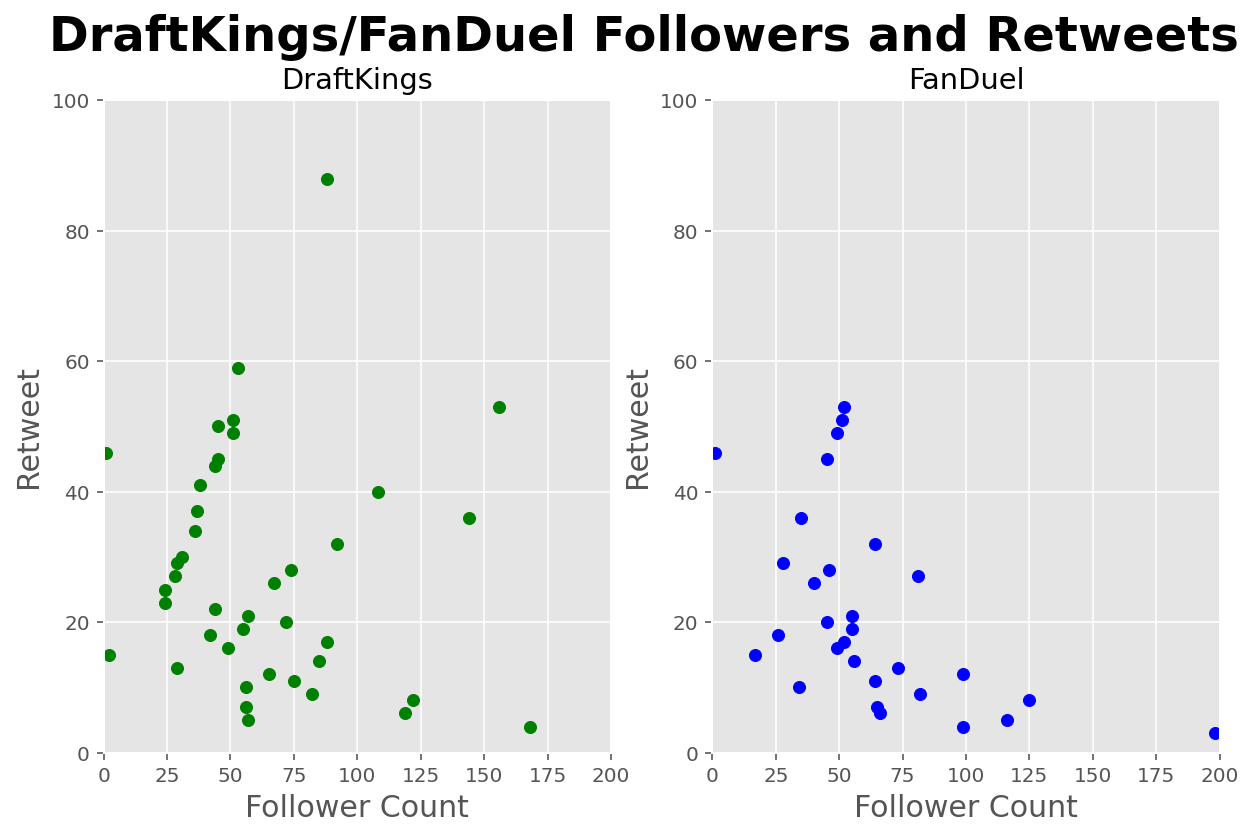

In [8]:
dk_follower_count = dk_df.groupby(dk_df.retweet).agg('count')
dk_follower_count.sort_values(by = "follower count", ascending=False)
dk_follower_count.reset_index(inplace=True)
dk_x = dk_follower_count['follower count']
dk_y = dk_follower_count['retweet']

fd_follower_count = fd_df.groupby(fd_df.retweet).agg('count')
fd_follower_count.sort_values(by = "follower count", ascending=False)
fd_follower_count.reset_index(inplace=True)
fd_x = fd_follower_count['follower count']
fd_y = fd_follower_count['retweet']


fig = plt.figure()

ax1 = fig.add_subplot(121)
ax1.scatter(dk_x, dk_y, color='green')
ax1.set_title('DraftKings')
ax1.set_xlim(0, 200)
ax1.set_ylim(0, 100)
ax1.set_xlabel('Follower Count', fontsize=15)
ax1.set_ylabel('Retweet', fontsize=15)

ax2 = fig.add_subplot(122)
ax2.scatter(fd_x, fd_y, color='blue')
ax2.set_title('FanDuel')
ax2.set_xlim(0, 200)
ax2.set_ylim(0, 100)
ax2.set_xlabel('Follower Count', fontsize=15)
ax2.set_ylabel('Retweet', fontsize=15)


fig.suptitle('DraftKings/FanDuel Followers and Retweets', fontsize=24, fontweight='bold')
plt.savefig("../img/Followers and Retweets", bbox_inches='tight')
plt.show()

# Noticed several of anomalies wtih very high retweets

In [9]:
dk_df.retweet.value_counts()[:10]

0      3188
1      1454
632     613
2       562
3       279
251     246
4       168
53      156
36      144
8       122
Name: retweet, dtype: int64

In [10]:
bot1 = dk_df[dk_df.retweet == 632] #retweets from user:@MONEYGANGJAMES1
list(bot1.username) #usernames include several computer generated looking usernames such as '2GkeqS0mhUuBfMq'

['ukL1XNjBzqw2vcw',
 'kindnesshp',
 'anthoanedawson',
 'Galina97015451',
 'daaamiirna',
 'VilanLia',
 'Shahin74784554',
 '2GkeqS0mhUuBfMq',
 'DKantyshev',
 'polchedonfabian',
 'Y8vIHmtcSXLzEst',
 'njflr7uEmIrDmlJ',
 'Lus86392972',
 'C1XCqvfQQBn3t6l',
 'igor76345046',
 'Aryanazizi11',
 '3yCSr2ShRC5v9Et',
 'Nurkhan61986744',
 'A95474515',
 'artist20406210',
 'SagaraWarnakul1',
 'D1XFtYsNtIATkvT',
 'borovikchek',
 '6FOH1jCQse8a36v',
 'andrey395090268',
 'xOykg6JWBHEXW2V',
 'Vohonius',
 'younesnarouei1',
 'ldfWR4OTl5xkcKB',
 'Upakoi',
 'Leha82597942',
 'houspainting',
 'pupsik89131180',
 'MgXXnO1BBSKrMrG',
 '0FSi2L53U3V058x',
 'bU8mq883bEFIR2o',
 'surgut8186',
 '5buJAtQ7yFYCvh3',
 'TSmurygina',
 'Anarhist881',
 '3Cqy8i2BfJXFUFf',
 'VnEw0KY43WGZdb5',
 'carlosr38172804',
 'yEau19m6pxt6PTG',
 'WqAWRnBYSZVL2zD',
 'Ssashagoldstar',
 'cmcAArmWzqt0pbE',
 'UqJIu3c68vuEaXv',
 'lC6Vlc3H78I3wDc',
 'EljaouhariMouad',
 'IRINA43611694',
 'tA9iNdkxyB3mhPU',
 'pokemon23689889',
 'stella_riera',
 '719oL1iE

In [11]:
bot2 = dk_df[dk_df.retweet == 251] #retweets from user: @Vegassyndicate
list(bot2.username) #usernames don't seem like bots

['VegasSyndicate',
 'Flazelda',
 'Matheus_santo12',
 'AgustinSerapio',
 'jose_eucariz',
 '1081Leo',
 'naomi_144',
 'hartajk',
 '247_pedro',
 'emersonconceia1',
 'alexcac89883896',
 'bandaredlip',
 'wannapapan',
 'Heloise481',
 'ThavaKumar1997',
 'abubaker260',
 '11Deltoro',
 'Vandi_6666',
 'Spotty828',
 'Paredon16',
 'Jumbo80908533',
 'itamarillanesfr',
 'Vntura92',
 'Camacho1208',
 'HavenCarol',
 'regiavii',
 '335_emilio',
 'Emelina2049',
 '1781Angel',
 'gvfjm',
 'juancar04036862',
 'jawwaw1234',
 'joomycity',
 'AritzaBieber',
 'gabriel94561799',
 'Paddy585',
 '2012_lovely',
 'Qotriz',
 'sangraffiti',
 'AuElias',
 'LTAY1461',
 'negra_yesica',
 'fabifar711025',
 'Keshatrxx',
 'maria74750993',
 'j0o0lly',
 'Yazeed907H',
 'HelloKitty9862',
 'cIXjoH9IUczbNmV',
 '1198Karina',
 'SilDaniel1325',
 'riya00860072',
 'cardozo166',
 'andreia894',
 'lucida2',
 'trejo264',
 'AnothaOne32',
 '1310FILIPE',
 'eddy_1223',
 '360JUDGEITO247',
 'AynoaVieira',
 'Diegosalicas',
 'juandavidgts',
 'OollolLing'

In [12]:
# Decided to remove these anomaly retweets
dk_df = dk_df[dk_df.text != "b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\\n\\nINVEST!\\n\\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\\xe2\\x80\\xa6'"]
dk_df = dk_df[dk_df.text != "b'RT @VegasSyndicate: $500 GUARANTEE TODAY...YOU CAN NOT BEAT IT...\\n\\n+ YOU WILL WIN \\xf0\\x9f\\x92\\xb0\\xf0\\x9f\\x92\\xb2\\xf0\\x9f\\x92\\xb4\\xf0\\x9f\\x92\\xb6\\n\\nWE WENT 11-3 IN #CBB / #1 in the\\xf0\\x9f\\x8c\\x8e\\n\\nWE WILL PRINT MO\\xe2\\x80\\xa6'"]        

# FanDuel dataframe had the same anomoly retweets
fd_df = fd_df[fd_df.text != "b'RT @MONEYGANGJAMES1: LISTEN UP FRIENDS &amp; FAMILY:\\n\\nINVEST!\\n\\nTHE 2020 PANINI PRIZM FOOTBALL DRAFT PICKS HOBBY BOX IS ALMOST SOLD OUT! BUY NOW\\xe2\\x80\\xa6'"]
fd_df = fd_df[fd_df.text != "b'RT @VegasSyndicate: $500 GUARANTEE TODAY...YOU CAN NOT BEAT IT...\\n\\n+ YOU WILL WIN \\xf0\\x9f\\x92\\xb0\\xf0\\x9f\\x92\\xb2\\xf0\\x9f\\x92\\xb4\\xf0\\x9f\\x92\\xb6\\n\\nWE WENT 11-3 IN #CBB / #1 in the\\xf0\\x9f\\x8c\\x8e\\n\\nWE WILL PRINT MO\\xe2\\x80\\xa6'"]        


In [13]:
dk_df.retweet.value_counts()[:10] #it worked! We got rid of moneygangjames and VegasSyndicate promotions

0     3188
1     1454
2      562
3      279
4      168
53     156
36     144
8      122
6      119
40     108
Name: retweet, dtype: int64

In [14]:
# Note: The queries below were not suspicious and I decided to keep them in the data

    # dk_df[dk_df.retweet == 36] # @dailysportpickz, giveaway for a RT
    # dk_df[dk_df.retweet == 53] # @dailysportpickz, giveaway for a RT
    # dk_df[dk_df.retweet == 88] # @GirlNextDoorBet (Raiders-Chiefs game going in 9-3

# Compare By Source Type

In [15]:
from collections import Counter
print(f'DraftKings by Source\n {Counter(dk_df.source).most_common(10)}')
print(f'FanDuels by Source \n {Counter(fd_df.source).most_common(10)}')

DraftKings by Source
 [('Twitter for iPhone', 2919), ('Twitter for Android', 1395), ('Twitter Web App', 1284), ('Sprout Social', 643), (nan, 557), ('SWM Automated Tweets For Members', 464), ('FlashPug ReTweeter Bot', 168), ('TweetDeck', 151), ('IFTTT', 80), ('Khoros', 64)]
FanDuels by Source 
 [('Twitter for iPhone', 1683), ('Twitter for Android', 1002), ('Twitter Web App', 719), ('Sprout Social', 589), ('SWM Automated Tweets For Members', 374), ('FlashPug ReTweeter Bot', 130), ('IFTTT', 94), ('TweetDeck', 83), ('Zapier.com', 43), ('Sports from the Basement', 25)]


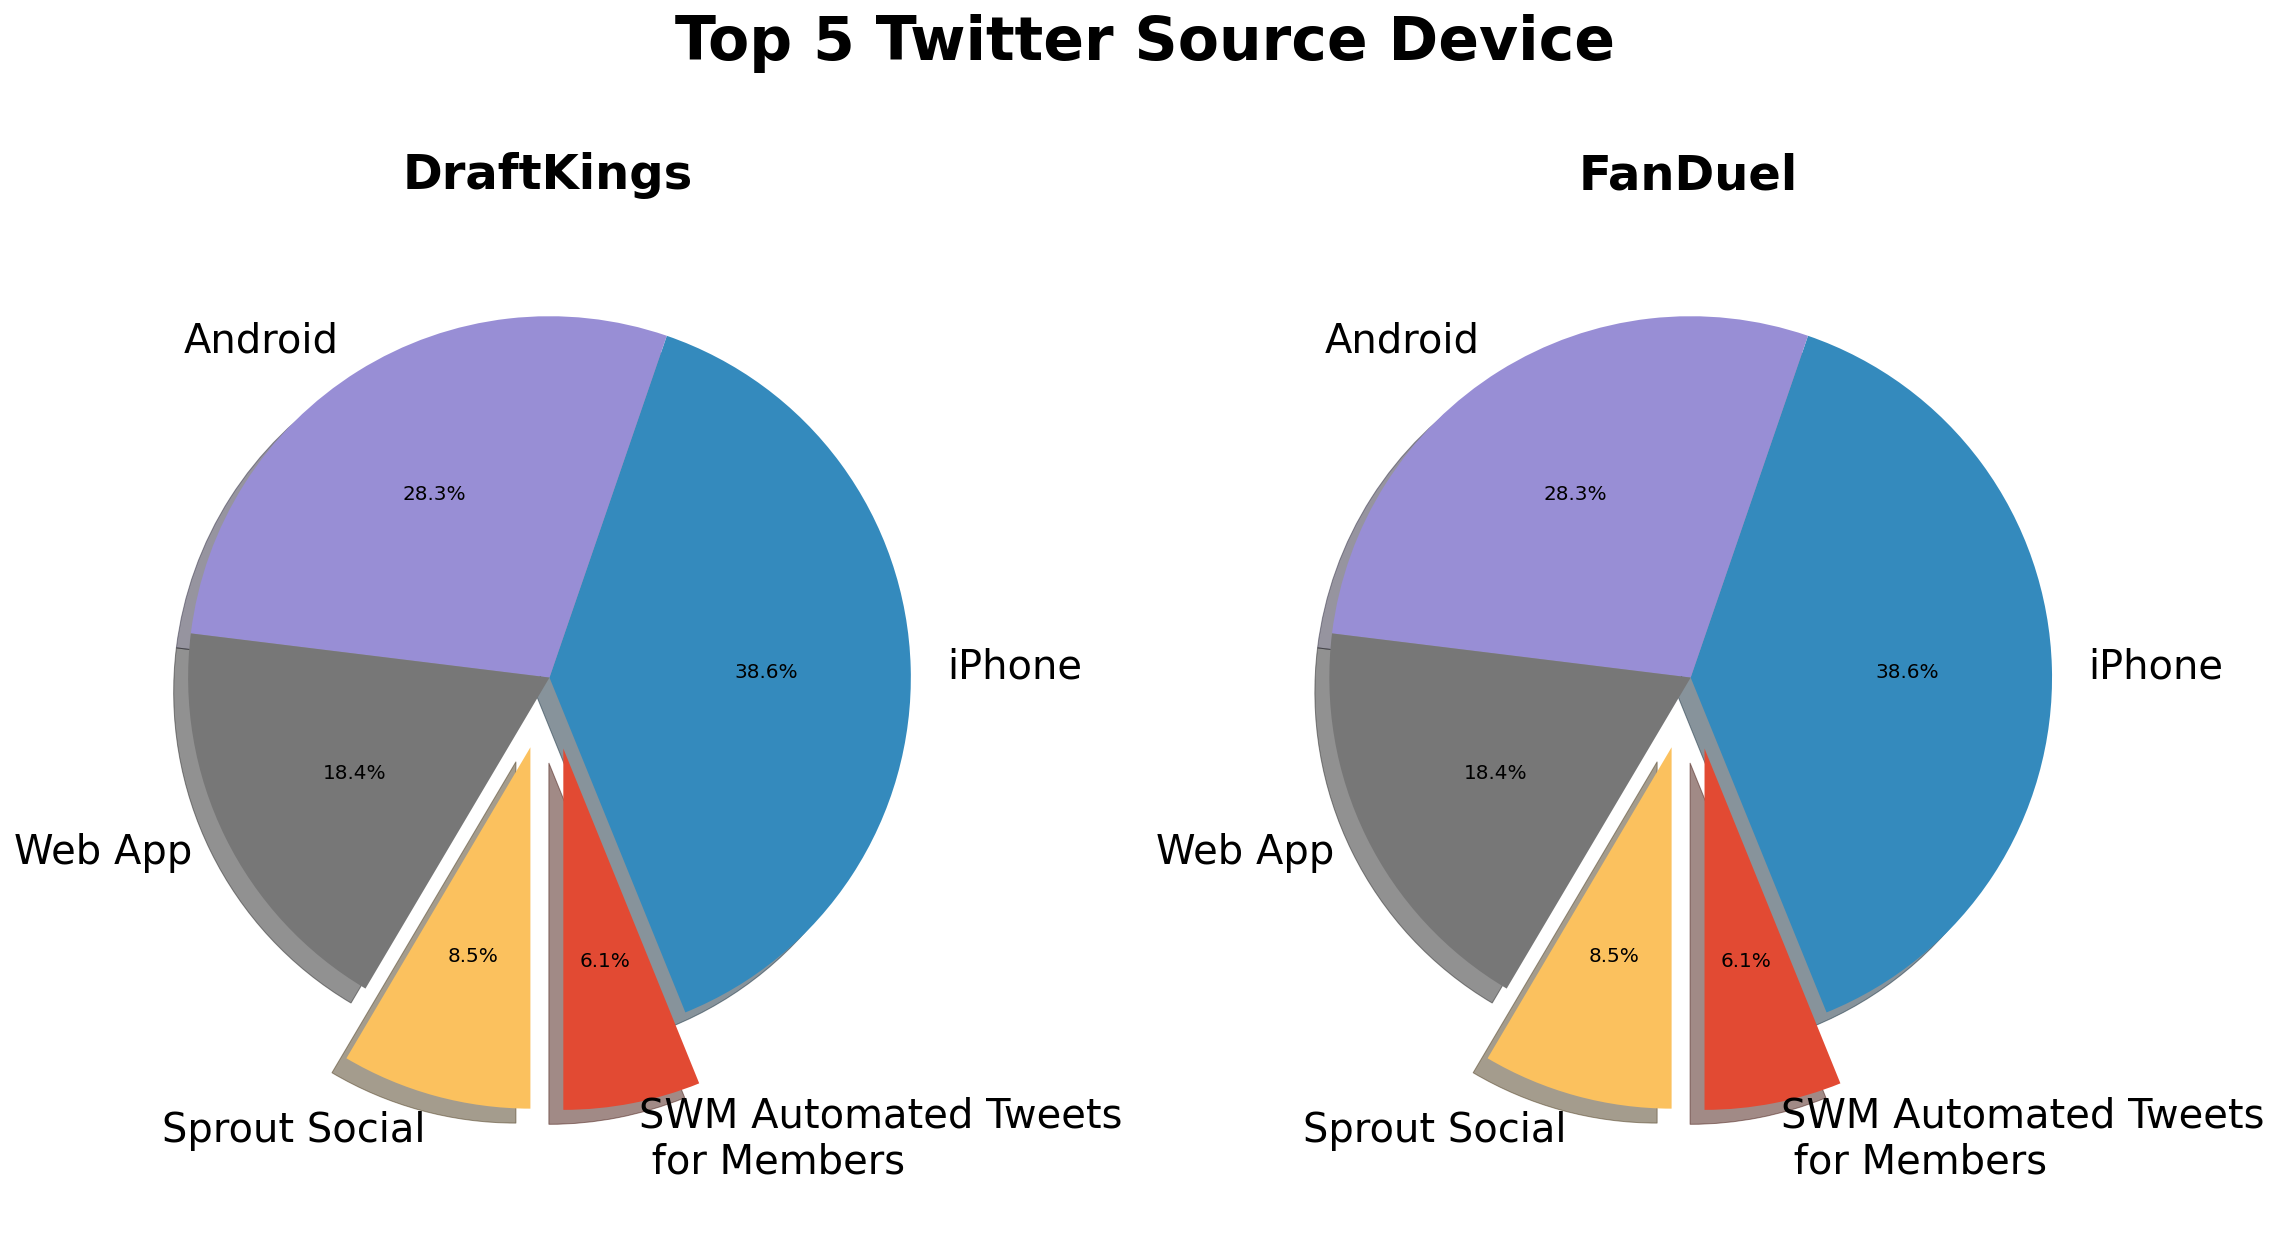

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 8))

dk_labels = 'SWM Automated Tweets \n for Members','iPhone', 'Android', 'Web App', 'Sprout Social' 
dk_sizes = [464, 2919, 2141, 1395, 643]
dk_explode = (.2, 0, 0, 0, .2)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax1.pie(dk_sizes, explode=dk_explode, labels=dk_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('DraftKings', fontsize = 24, fontweight='bold')

fd_labels = 'SWM Automated Tweets \n for Members','iPhone', 'Android', 'Web App', 'Sprout Social' 
fd_sizes = [374, 1683, 1747, 829, 589]
fd_explode = (.2, 0, 0, 0, .2)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax2.pie(dk_sizes, explode=dk_explode, labels=dk_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('FanDuel',fontsize = 24, fontweight='bold')


fig.suptitle('Top 5 Twitter Source Device', fontsize=30, fontweight ='bold').set_position([.5, 1.1])
plt.tight_layout()
plt.savefig('../img/Source Device', bbox_inches='tight')
plt.show()

In [17]:
sprout_social = dk_df[dk_df.source == 'Sprout Social']
sprout_social.username.unique()

array(['Awesemo_Com', 'AwesemoGolf', 'AwesemoNFL', 'FTNNetwork',
       'FTNDaily', 'AwesemoEsports', 'AwesemoMMADFS', 'Autodraftshow',
       'GoldenMardiGras'], dtype=object)

In [18]:
SWM_automated = dk_df[dk_df.source == 'SWM Automated Tweets For Members']
SWM_automated.username.unique() #all from user:sportswatch1

array(['SportsWatch1'], dtype=object)

# Compare By User Location

In [19]:
print('DraftKings \n')
print(dk_df['location'].value_counts().head(10))
print('\nFan Duel \n')
print(fd_df['location'].value_counts().head(10))

DraftKings 

Chicago, IL                650
Pasadena, California       541
Las Vegas, NV              531
United States              253
Massachusetts, USA         186
England, United Kingdom    178
Henderson, Nevada          135
Boston, MA                 123
Winners Lane                88
New Jersey, USA             75
Name: location, dtype: int64

Fan Duel 

Chicago, IL                573
Las Vegas, NV              420
United States              257
New Jersey, USA            138
Massachusetts, USA         131
England, United Kingdom    130
Henderson, Nevada           99
Brigantine, NJ              91
Winners Lane                66
Chicago, Illinois           55
Name: location, dtype: int64


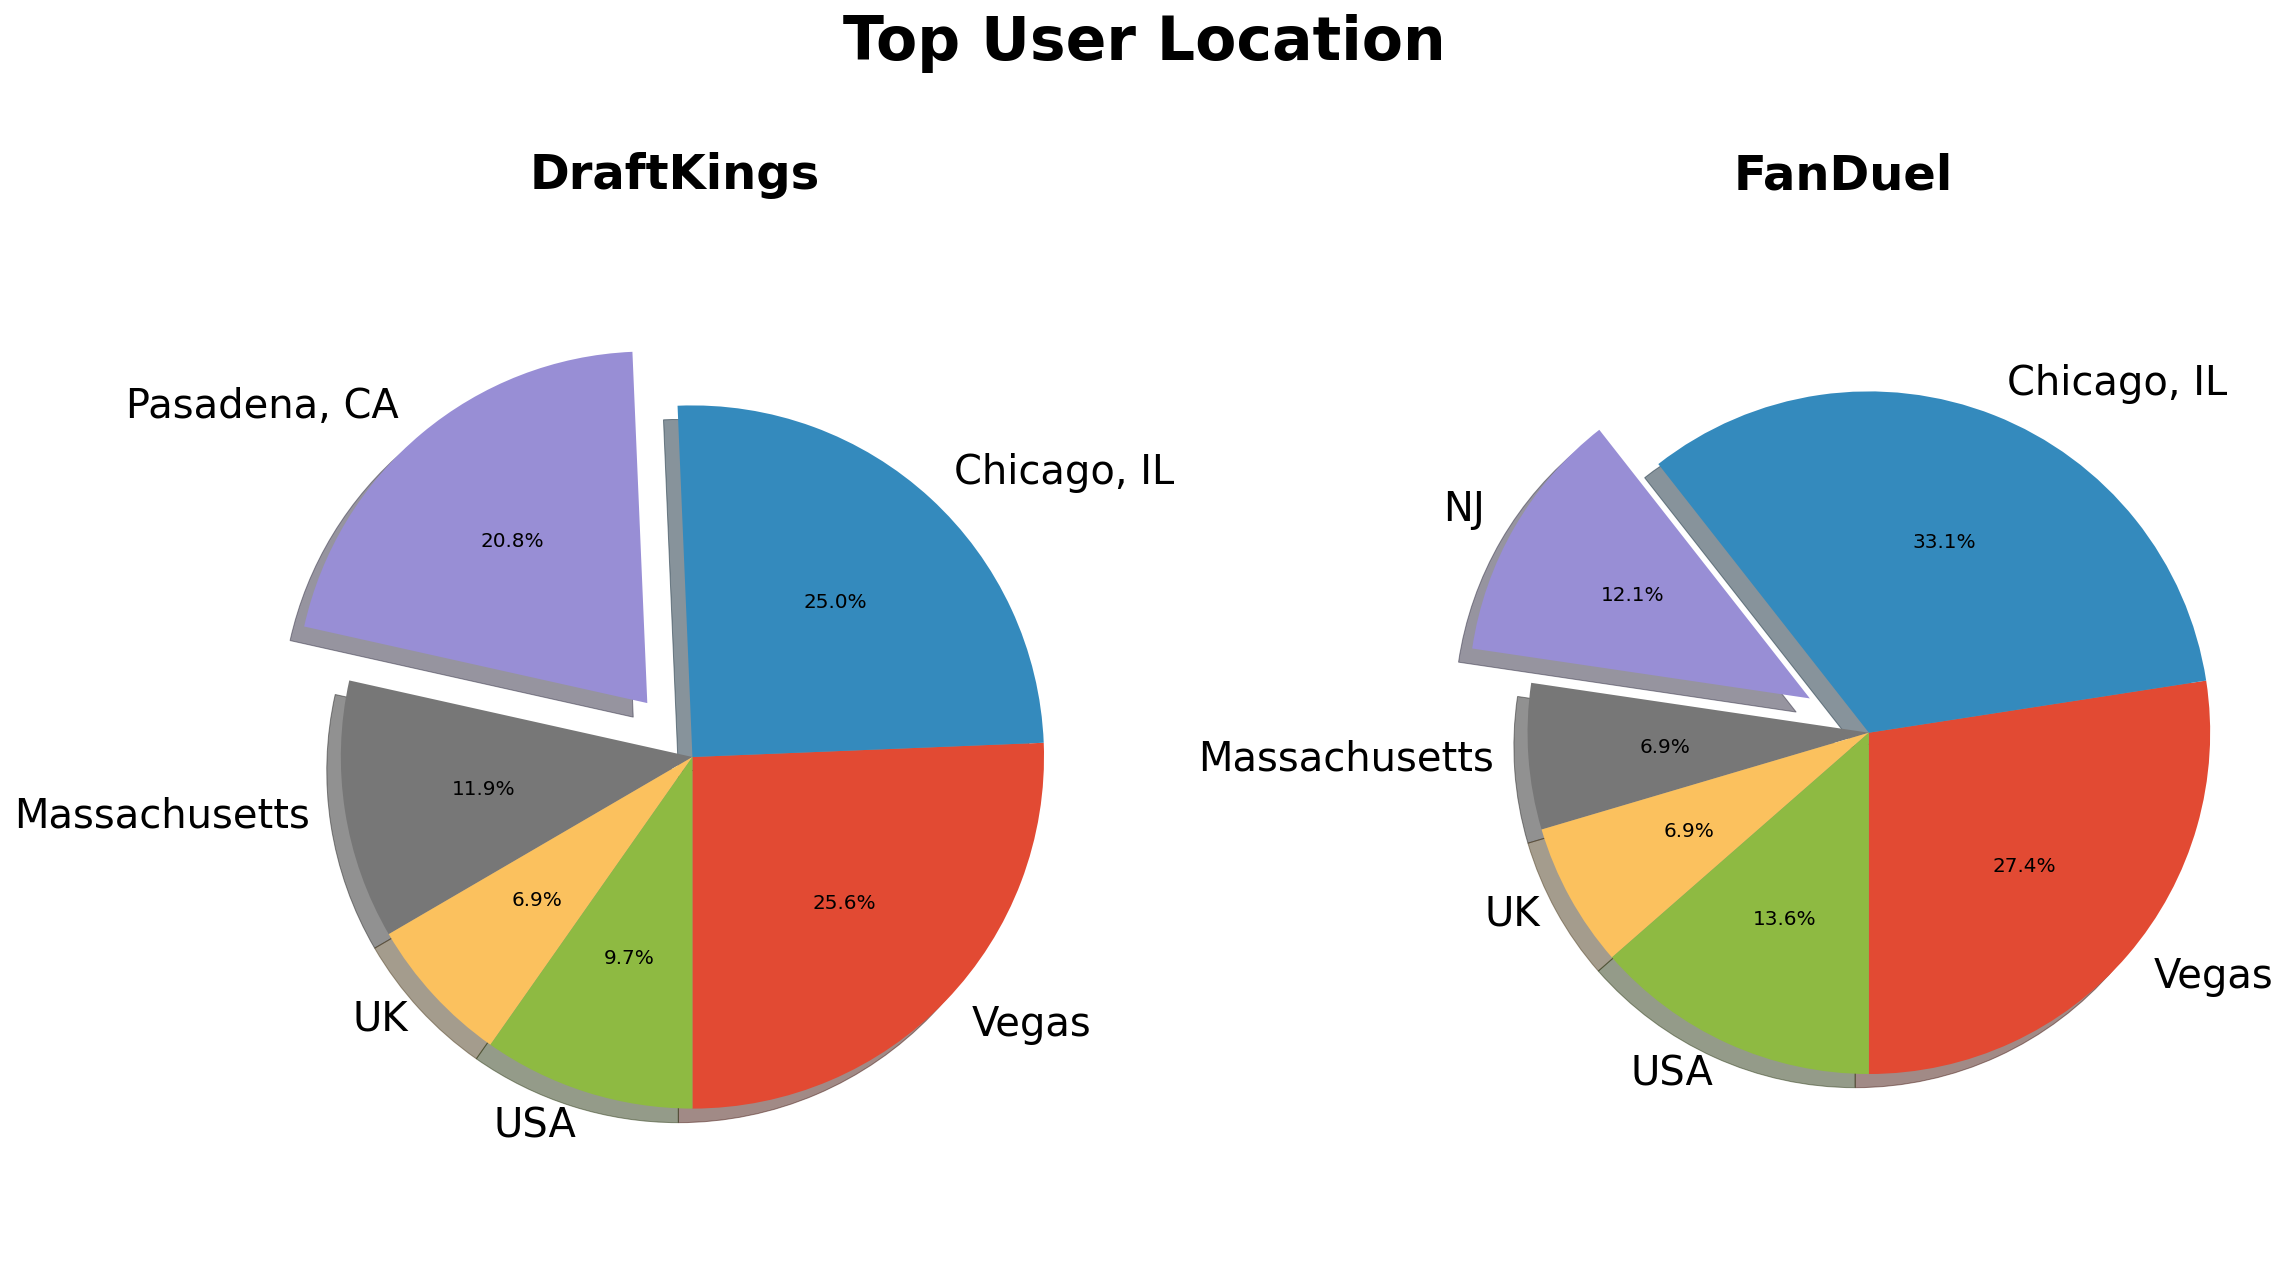

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16, 8))

dk_labels = 'Vegas', 'Chicago, IL', 'Pasadena, CA', 'Massachusetts', 'UK', 'USA'
dk_sizes = [666, 650, 541, 309, 178, 253]
dk_explode = (0, 0, .2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax1.pie(dk_sizes, explode=dk_explode, labels=dk_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('DraftKings', fontsize = 24, fontweight='bold')

fd_labels = 'Vegas', 'Chicago, IL', 'NJ', 'Massachusetts', 'UK', 'USA'
fd_sizes = [520, 628, 229, 131, 130, 257]
fd_explode = (0, 0, .2, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

patches, texts, autotexts = ax2.pie(fd_sizes, explode=fd_explode, labels=fd_labels, autopct='%1.1f%%',
        shadow=True, startangle=270)
[texts[i].set_fontsize(20) for i, text in enumerate(texts)]
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('FanDuel',fontsize = 24, fontweight='bold')


fig.suptitle('Top User Location', fontsize=30, fontweight ='bold').set_position([.5, 1.1])
plt.tight_layout()
plt.savefig('../img/User Location', bbox_inches='tight')
plt.show()

# Filter out common users to create a dataframe with just the exclusive users

In [21]:
print(f'DraftKings Unique Usernames: {len(dk_df.username.unique())}')
print(f'FanDuel Unique Usernames: {len(fd_df.username.unique())}')

DraftKings Unique Usernames: 1942
FanDuel Unique Usernames: 1223


In [22]:
# before filtering @MONEYGANGJAMES1 and @Vegassyndicate, there were 1724 twitter users in common out of 2789 unique users in draftkings, 2076 twitter users in fanduels

In [23]:
common_users = list(pd.merge(dk_df.username, fd_df.username, how ='inner', on =['username']).username.unique()) #len = 871
all_users = list(pd.merge(dk_df, fd_df, how = 'outer', on =['username']).username.unique()) # len = 2294

exclusive_user = []
for user in all_users:
    if user not in common_users:
        exclusive_user.append(user)

exclusive_users = pd.Series(exclusive_user) #len = 1423

In [24]:
dk_df_exclusive = dk_df[~dk_df.username.isin(exclusive_users)]
dk_df_exclusive.shape

(5257, 8)

In [25]:
fd_df_exclusive = fd_df[~fd_df.username.isin(exclusive_users)]
fd_df_exclusive.shape

(4319, 8)

# PICKLE for future use

In [26]:
import pickle
dk_df_exclusive.to_pickle("../data/dk.pkl")
fd_df_exclusive.to_pickle("../data/fd.pkl")

<function matplotlib.pyplot.show(*args, **kw)>

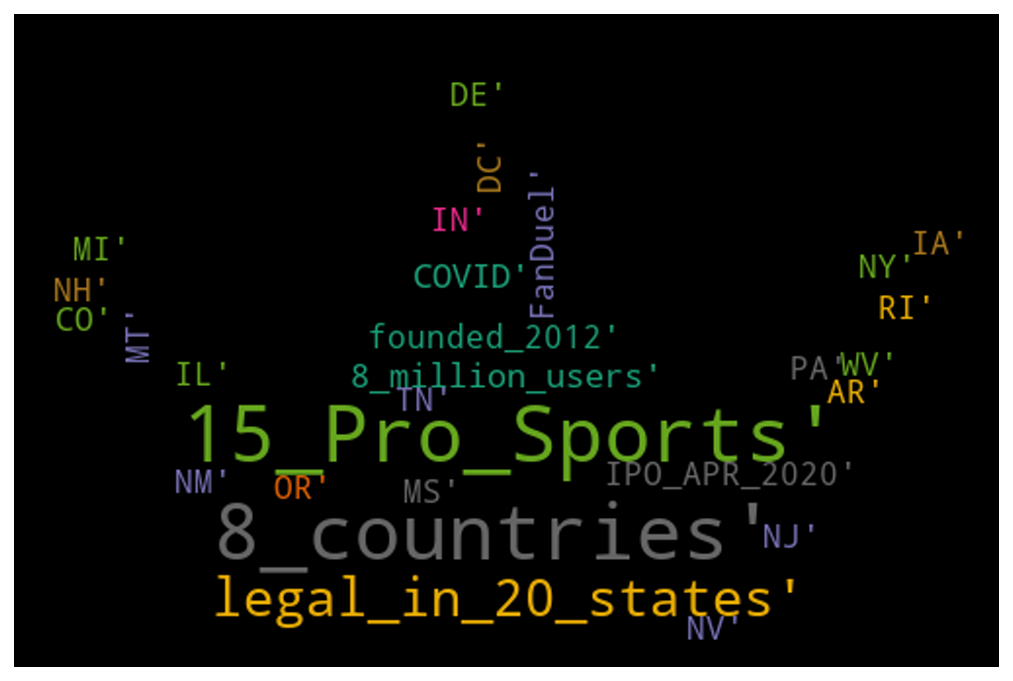

In [29]:
#word cloud for the presentation -  Background 
from PIL import Image
from wordcloud import WordCloud

words = ['15_Pro_Sports', '8_countries', 'legal_in_20_states','8_million_users', 
         'COVID', 'IPO_APR_2020', 'FanDuel','founded_2012',
         'NH', 'RI', 'DE', 'DC', 'NY', 'NJ','PA', 'MI', 'WV', 
        'IL', 'IN', 'TN', 'MS', 'IA', 'AR', 'MT', 'CO', 'NM', 'NV', 'OR']

dk_mask = np.array(Image.open('../img/crown.jpg'))

wc = WordCloud(background_color="black", colormap="Dark2",
               max_font_size=40, random_state=30, mask=dk_mask).generate("".join(str(words)))

plt.axis('off')
plt.imshow(wc, interpolation="spline16")
plt.savefig('../Background_slide_wordcloud.png')
plt.show